# Image Tutorial

https://matplotlib.org/users/image_tutorial.html

In [36]:
%matplotlib inline

With IPython started, we now need to connect to a GUI event loop. This tells IPython where (and how) to display plots.

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



### Importing image data into Numpy arrays

In [38]:
img=mpimg.imread('stinkbug.png')   #(375-rows, 500-columns, 3-[R G B]) 


Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it’s a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency), has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, matplotlib supports float32 and uint8 data types. For grayscale, matplotlib supports only float32. If your array data does not meet one of these descriptions, you need to rescale it.

The image is read from left to right and the valuees in each pixel is saved as a RGB value

| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 
| - |   | - |
| RGB1 | RGB2 | RGB3 | RGB4 | RGB5 | RGB6 | RGB7 | RGB8 |
| RGB9 | RGB10 | RGB11 | RGB12 | RGB13 | RGB14 | RGB15 | RGB16 |
| RGB17 | RGB18 | RGB19 | RGB20 | RGB21 | RGB22 | RGB23 | RGB24 |
| RGB25 | RGB26 | RGB27| RGB28 | RGB29 | RGB30 | RGB31 | RGB32 |
| RGB33 | RGB34 | RGB35 | RGB36 | RGB37 | RGB38 | RGB39 | RGB40 |
| RGB41 | RGB42 | RGB43 | RGB44 | RGB45 | RGB46 | RGB47 | RGB48 |

### Plotting numpy arrays as images

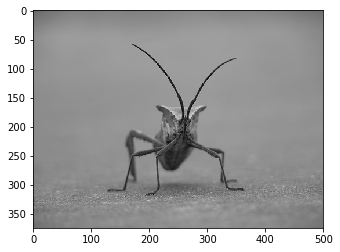

In [40]:
imgplot = plt.imshow(img)

In [41]:
img.shape     

(375, 500, 3)

### Applying Filters to Images

We currently have an RGB image. Since R, G, and B are all similar (see for yourself above or in your data), we can just pick one channel of our data:(the data at R)

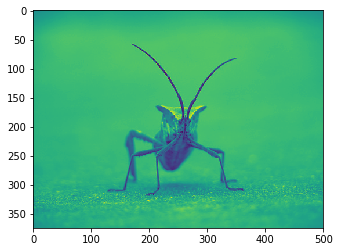

In [49]:
lum_img = img[:,:,0]   # (375, 500)
plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image. We can apply sequential color map. 

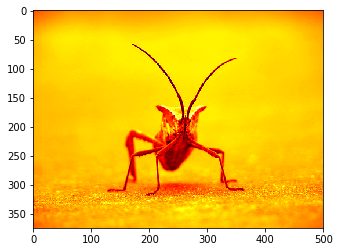

In [50]:
plt.imshow(lum_img, cmap='hot')

However, remember that in the IPython notebook with the inline backend, you can’t make changes to plots that have already made. lum_img will remain same

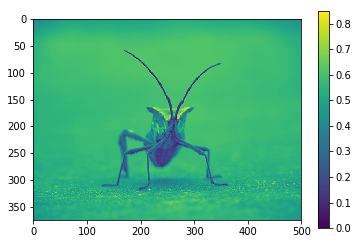

In [53]:
plt.imshow(lum_img)
plt.colorbar()     # has to be in the same cell as in graph

### Histogram out of Image Data

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram.

(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

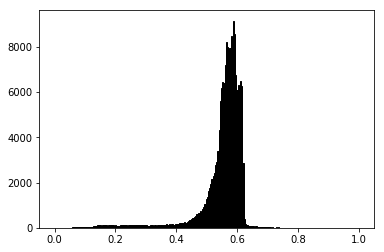

In [59]:
plt.hist(lum_img.ravel(), bins=256, range=(0, 1.0), fc='k', ec='k')

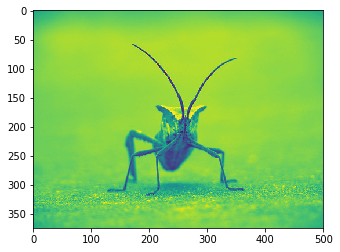

In [60]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

Most often, the “interesting” part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there’s not much useful information in the high end (not many white things in the image). Let’s adjust the upper limit, so that we effectively “zoom in on” part of the histogram. We do this by passing the clim argument to imshow. You could also do this by calling the set_clim() method of the image plot object, but make sure that you do so in the same cell as your plot command when working with the IPython Notebook - it will not change plots from earlier cells.

### Array Interpolation

The vaules in pixes are discrete. The gradient between two different pixles is large and if we want to smooth it. In this exercise let us try to understand this by shrinking the image. We’ll use the Pillow library that we used to load the image also to resize the image.

 Let’s take our image and shrink it. We’re effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren’t there anymore, and the computer has to draw in pixels to fill that space.

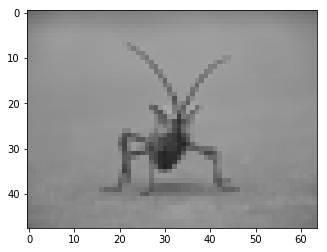

In [67]:
from PIL import Image
img = Image.open('stinkbug.png')
img.thumbnail((64,64))
imgplot = plt.imshow(img)